In [ ]:
# Установка нужных библиотек для питона. Запустите ячейку, нажав Shift + Enter.
# Для того, чтобы пройти практику в режиме слушателя (не выполняя упражнений и
# ничего не модифицируя) достаточно просто выполнять ячейки друг за другом,
# нажимая Shift + Enter
!pip install numpy --quiet
!pip install tensorflow --quiet
!pip install pandas --quiet
!pip install keras --quiet

# 🔢 Нейросеть для распознавания рукописных цифр с нуля!

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Нам нужно распознать рукописные цифры по их изображениям. Так как цифр 10, то в нашей задаче классификации 10 классов.

Наш набор данных MNIST часто используется для демонстрации возможностей различных алгоритмов машинного и глубинного обучения, так как для него достаточно просто добиться хорошей точности работы.

## ✍️ Процесс анализа данных:
1. Загрузим данные для обучения и тестирования
2. Предобработаем данные
3. Создадим модель для обучения
4. Обучим модель
5. Протестируем модель
6. Попробуем улучшить модель

Загрузим необходимые библиотеки: `keras` для работы с нейросетями, `numpy` для научных вычислений, `matplotlib` для построения графиков.

* Наша нейронная сеть будет делать ряд последовательных преобразований данных, поэтому нам нужен тип нейронных сетей Sequential
* Типы преобразваний, с которыми мы будем работать: полносвязный слой Dense, активация Activation, преобразование матрицы в длинный вектор Flatten.

Еще мы будем использовать данные MNIST - они могут быть загружены из открытых источников с помощью keras.

Выполните ячейку ниже:

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import keras.datasets

import numpy as np
from matplotlib import pyplot as plt

## 📦 1. Загрузка данных

В keras уже есть несколько популярных датасетов, которые можно легко загрузить. Давайте загрузим набор данных MNIST.

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f"🤖 Всего {X_train.shape[0]} изображений в обучающей выборке и {X_test.shape[0]} в тестовой.")
print(f"🤖 Вот так выглядит первый элемент нашей обучающей выборки. Это матрица размера {X_train[0].shape}")
print(X_train[0])

🤖 Всего 60000 изображений в обучающей выборке и 10000 в тестовой.
🤖 Вот так выглядит первый элемент нашей обучающей выборки. Это матрица размера (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0  

## 🎁 2. Подготовка данных
**Нормализация значений на [0,1] и перевод целевой переменной в one-hot формат**

Нормализация данных часто способствует более стабильному обучению ML моделей. Здесь мы сделаем так, чтобы значения всех входных признаков лежали в интервале от 0 до 1. Это делаем делением на 255 (потому что, как видно выше, сейчас это целые числа от 0 до 255).

Еще нейронной сети нужно значение выходной переменной в one-hot формате.
Это делаем функцией из keras keras.utils.to_categorical, которая принимает на вход исходный вектор значений выходной переменной и число классов.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

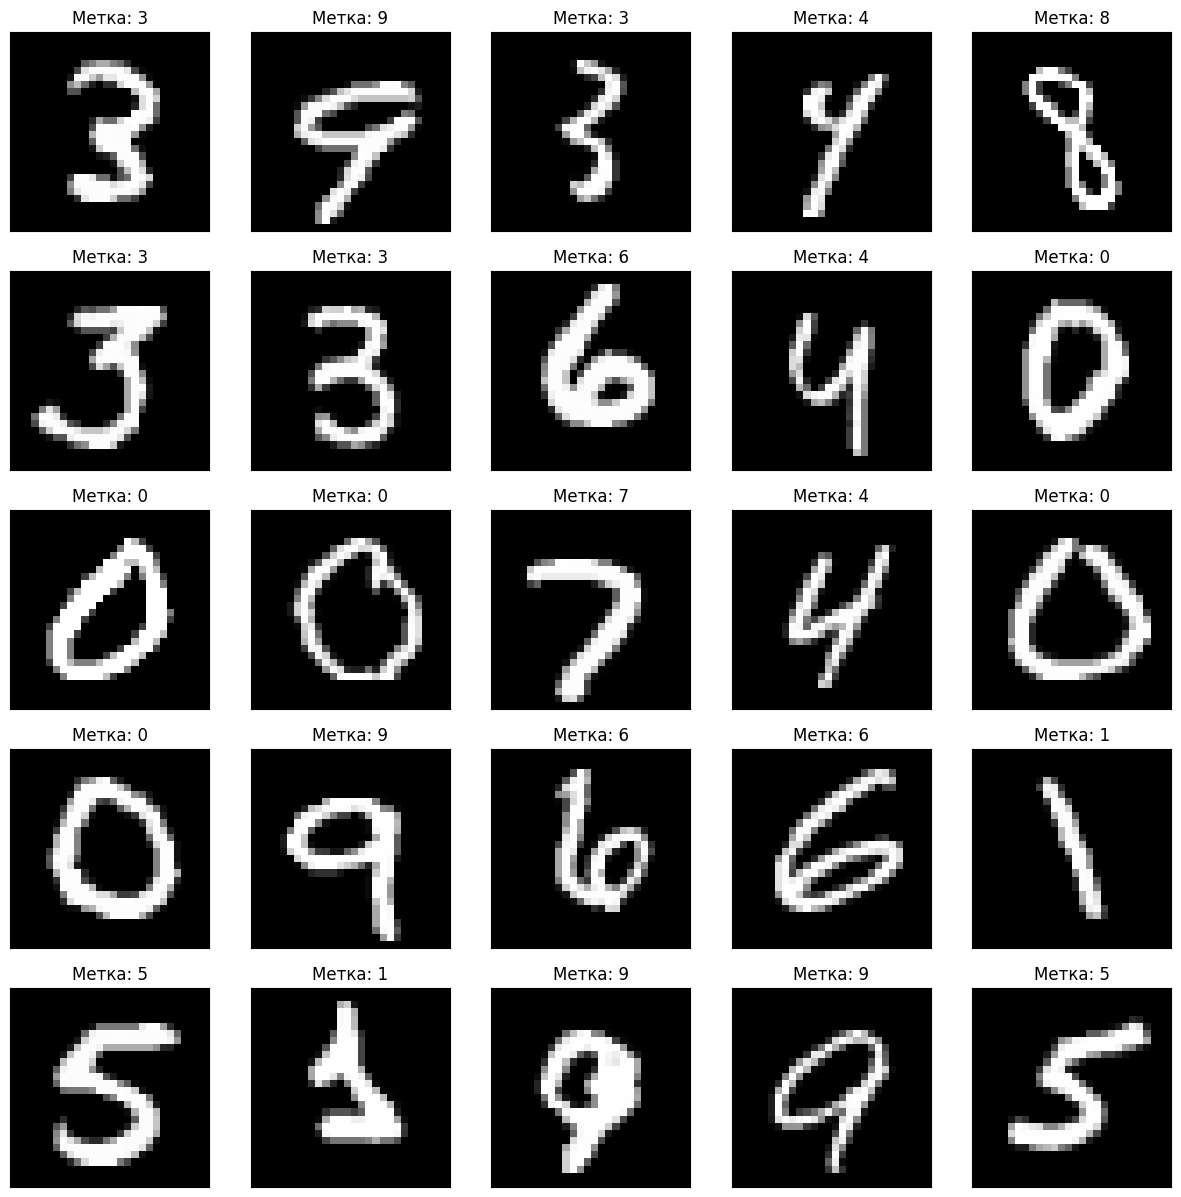

In [ ]:
# Helper functions for images.

def show_img(img, ax=None, title=None):
    """Shows a single image."""
    if ax is None:
        ax = plt.gca()
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    if title:
        ax.set_title(title)

def show_img_grid(imgs, titles):
    """Shows a grid of images."""
    n = int(np.ceil(len(imgs)**.5))
    _, axs = plt.subplots(n, n, figsize=(3 * n, 3 * n))
    for i, (img, title) in enumerate(zip(imgs, titles)):
        show_img(img, axs[i // n][i % n], title)

def show_examples(data, label, predicted = None):
    idxs = np.random.randint(0, len(data), 25)
    if np.array(label).max() <= 1:
        label = np.argmax(label, axis=-1)

    if predicted is not None:
        if np.array(predicted).max() <= 1:
            predicted = np.argmax(predicted, axis=-1)
    show_img_grid(
    [data[idx] for idx in idxs],
    [f'Метка: {label[idx]}' if predicted is None else f'Метка: {label[idx]}. Предсказание: {predicted[idx]}' for idx in idxs],
    )

show_examples(X_test, y_test)

Посмотрим на то, в каком виде у нас хранятся входные признаки, напечатав размер первого объекта из обучающей выборки.

Для данных MNIST это изображения 28 на 28.

In [ ]:
input_size = X_train[0].shape
print(f"🤖 Размер изображения {input_size} пикселей")
print(f"🤖 Значения всех пикселей лежат в диапазоне от {X_train.min()} до {X_train.max()}")
print(f"🤖 Метка класса первой картинки в исходном формате {np.argmax(y_train[0])}")
print(f"🤖 Метка класса первой картинки в one-hot формате {y_train[0]}")

🤖 Размер изображения (28, 28) пикселей
🤖 Значения всех пикселей лежат в диапазоне от 0.0 до 1.0
🤖 Метка класса первой картинки в исходном формате 5
🤖 Метка класса первой картинки в one-hot формате [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 💃 3. Создание модели для обучения

Sequential здесь означает последовательный тип модели, в который мы добавляем слои друг за другом.

**Добавляем в модель слой за слоем.**

* Сначала вытягиваем картинку в длинный вектор слоем Flatten
* Потом идет полносвязный слой - нейроны в следующем слое зависят от всех переменных в предыдущем
* Далее применяем нелинейное преобразование ReLU
* Потом идет следующий полносвязный слой. В нем 10 выходов - по числу классов.
* В конце используем функцию активации softmax (она превращает любой вектор из 10 чисел в вектор вероятностей, т.е. все компоненты неотрицательные, а их сумма равна 1)


In [ ]:
model = Sequential()

model.add(Flatten())
model.add(Dense(units=16))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

После описания архитектуры необходимо скомпилировать модель, указав минимизируемую функцию потерь,
оптимизатор и попросив модель выводить точность работы на тестовой выорке в процессе обучения

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 👨‍🏫 4. Обучение модели
**Тренировка с указанием данных, числа эпох и размера подвыборки**

Теперь задана структура модели и то, как мы будем ее обучать.
Делаем это аналогично sklearn - с помощью метода fit.

После запуска fit мы оптимизируем параметры стохастическим градиентным спуском (SGD).
На каждом шаге стохастического градиентного спуска мы используем функцию потерь, которая подсчитана только по части полной выборки.

Два дополнительных параметра для обучения:
* batch_size - размер подвыборки, которая используется для одного шага оптимизации
* epochs - число эпох - сколько раз мы проходим полностью по всей выборке




In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6782 - loss: 1.0923
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9092 - loss: 0.3272
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9210 - loss: 0.2787
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9306 - loss: 0.2479
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9343 - loss: 0.2333


Можно посмотреть, какие карточки мы использовали для обучения модели.

In [ ]:
import subprocess
import cpuinfo
import tensorflow as tf

# Check CPU information
cpu_info = tf.config.list_physical_devices('CPU')
print("🤖 CPU Information:")

# Get CPU model name
cpu_model = cpuinfo.get_cpu_info()['brand_raw']
print(f"🤖 CPU Model: {cpu_model}")

# Check RAM information
ram_info = subprocess.check_output("free -m", shell=True).decode().split("\n")[1].split()
if len(ram_info) >= 7:
    ram_total = int(ram_info[1])
    ram_used = int(ram_info[2])
    ram_available = int(ram_info[6])
    print("\n🤖 RAM Information:")
    print(f"🤖 RAM Total: {ram_total} MiB")
    print(f"🤖 RAM Used: {ram_used} MiB")
    print(f"🤖 RAM Available: {ram_available} MiB")
else:
    print("🤖 Unable to retrieve RAM information")

# Check GPU information
gpu_info = tf.config.list_physical_devices('GPU')
if gpu_info:
    print("\n🤖 GPU Information:")
    for i, gpu in enumerate(gpu_info):
        print(f"🤖 GPU {i+1}:")
        device_name = tf.test.gpu_device_name()
        if device_name != "":
            gpu_name = subprocess.check_output(["nvidia-smi", "--query-gpu=name", "--format=csv,noheader"], universal_newlines=True)
            print(f"🤖 GPU Model: {gpu_name.strip()}")
        else:
            print("🤖 GPU Model: Unknown")
else:
    print("\n🤖 GPU not available")

# Check memory usage
print("\n🤖 Memory Information:")
if gpu_info:
    total_gpu_memory = 0
    for i, gpu in enumerate(gpu_info):
        try:
            cmd = f"nvidia-smi --query-gpu=memory.total,memory.used --format=csv,nounits,noheader"
            result = subprocess.check_output(cmd.split(), universal_newlines=True)
            gpu_memory = [int(x) for x in result.strip().split(',')]
            total_gpu_memory += gpu_memory[0]
            print(f"🤖 GPU {i+1} Memory Used: {gpu_memory[1]} MiB")
        except subprocess.CalledProcessError as e:
            print(f"🤖 Error retrieving memory information for GPU {i+1}: {e}")
    print(f"🤖 Total GPU Memory Available: {total_gpu_memory} MiB")
else:
    print("🤖 CPU Memory: Not applicable")


🤖 CPU Information:
🤖 CPU Model: Intel(R) Xeon(R) CPU @ 2.00GHz

🤖 RAM Information:
🤖 RAM Total: 12978 MiB
🤖 RAM Used: 2066 MiB
🤖 RAM Available: 10578 MiB

🤖 GPU Information:
🤖 GPU 1:
🤖 GPU Model: Tesla T4

🤖 Memory Information:
🤖 GPU 1 Memory Used: 641 MiB
🤖 Total GPU Memory Available: 15360 MiB


Еще можно посмотреть на нашу модель в целом: сколько в ней слоев, сколько параметров у каждого слоя с помощью команды model.summary()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,192 (149.19 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,462 (99.46 KB)

## 🧐 5. Валидация качества модели на тестовых данных

Выводятся значение функции потерь и точность.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
trainable_params = tf.keras.Model.count_params(model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9262 - loss: 0.2578


In [ ]:
print(f"🤖 Количество обучаемых параметров в модели {trainable_params}")
print(f"🤖 Точность предсказаний на тестовой выборке {test_accuracy:.3f}")
print(f"🤖 Значение функции потерь на тестовой выборке {test_loss:.3f}")

🤖 Количество обучаемых параметров в модели 12730
🤖 Точность предсказаний на тестовой выборке 0.936
🤖 Значение функции потерь на тестовой выборке 0.226


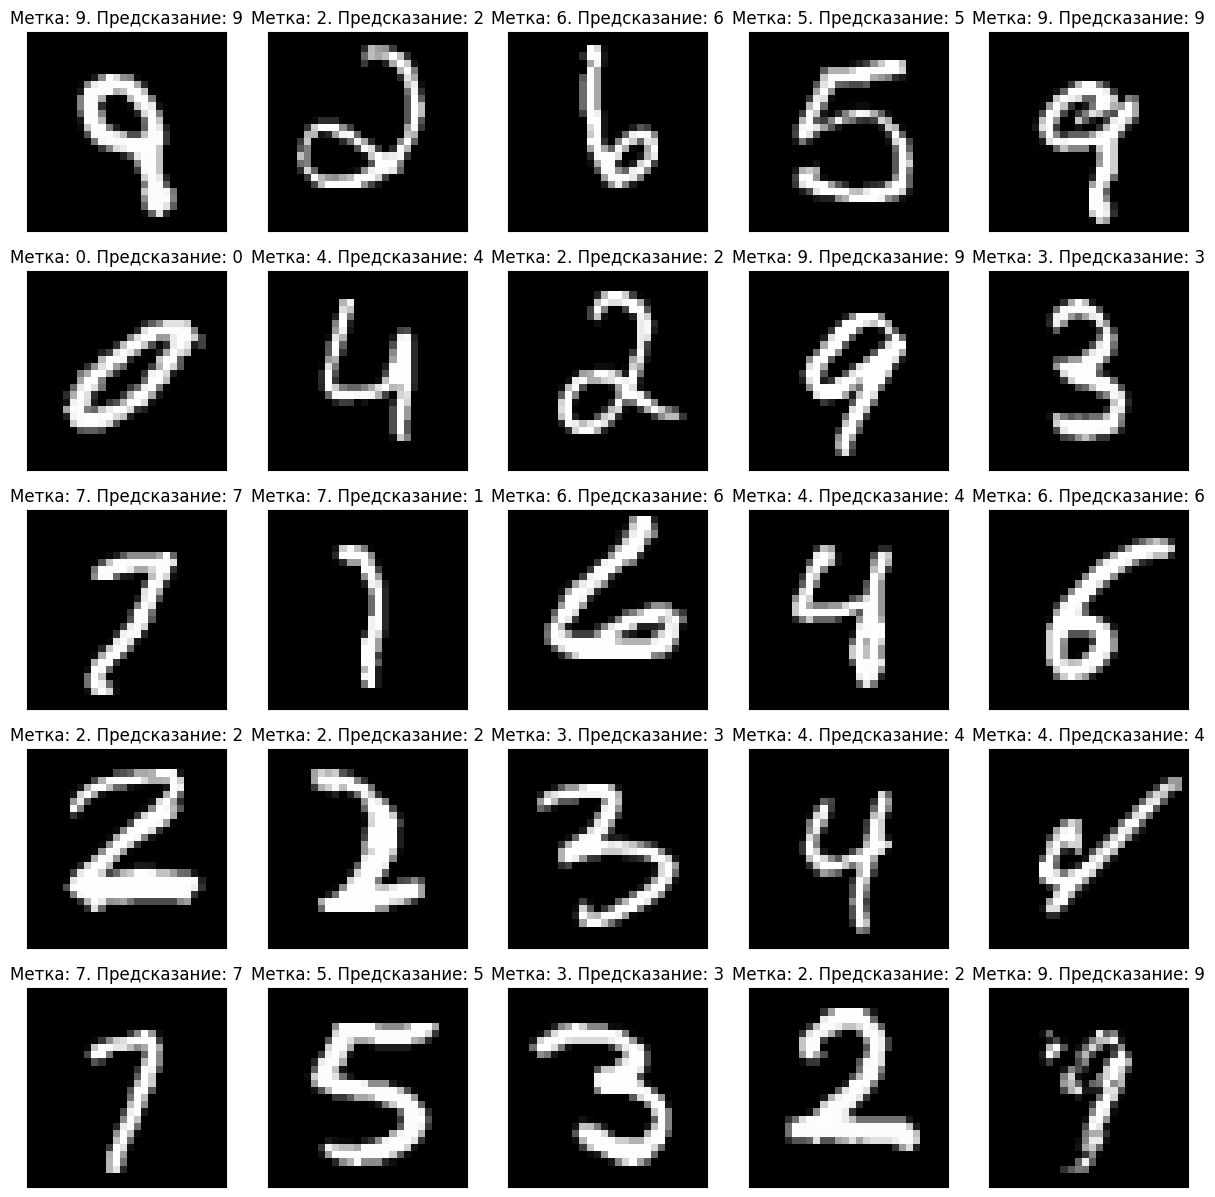

In [ ]:
show_examples(X_test, y_test, model(X_test))

## 💎 УПРАЖНЕНИЕ

Попробуйте изменить любые параметры ниже, чтобы качество предсказаний на тестовой выборке стало не менее 97%. Победит тот, кто сделает это с наименьшим числом параметров модели.

In [ ]:
# Попробуйте изменить параметры ниже на свой вкус

ЧИСЛО_НЕЙРОНОВ_В_ПЕРВОМ_СЛОЕ = 28
ФУНКЦИЯ_АКТИВАЦИИ = "gelu" # "selu", "elu", "softmax", "sigmoid", "relu", ...
ОПТИМИЗАТОР = "nadam" # "adam", "nadam", "rmsprop", "sgd"...
ЧИСЛО_ЭПОХ = 35
РАЗМЕР_БАТЧА = 10000

model = Sequential()

model.add(Flatten())
model.add(Dense(units=ЧИСЛО_НЕЙРОНОВ_В_ПЕРВОМ_СЛОЕ, activation=ФУНКЦИЯ_АКТИВАЦИИ))
model.add(Dense(units=ЧИСЛО_НЕЙРОНОВ_В_ПЕРВОМ_СЛОЕ, activation=ФУНКЦИЯ_АКТИВАЦИИ))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer=ОПТИМИЗАТОР,
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=ЧИСЛО_ЭПОХ, batch_size=РАЗМЕР_БАТЧА)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
trainable_params = int(tf.keras.Model.count_params(model))

print(f"🤖 Количество обучаемых параметров в модели {trainable_params}")
print(f"🤖 Точность предсказаний на тестовой выборке {test_accuracy:.3f}")
print(f"🤖 Значение функции потерь на тестовой выборке {test_loss:.3f}")

Epoch 1/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1681 - loss: 2.2507
Epoch 2/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3911 - loss: 2.0689
Epoch 3/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5167 - loss: 1.7807
Epoch 4/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6131 - loss: 1.4579
Epoch 5/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6931 - loss: 1.1855
Epoch 6/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7639 - loss: 0.9617
Epoch 7/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8112 - loss: 0.7945
Epoch 8/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8403 - loss: 0.6696
Epoch 9/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8576 - loss: 0.5842
Epoch 10/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8702 - loss: 0.5149
Epoch 11/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8781 - loss: 0.4703
Epoch 12/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8843 - loss: 0.4358
E

## 📈 ЭКСТРА: Улучшение модели (попробуем добавить сверточный слой)

Добавим явно число каналов в наш датасет - это важно для сверточных слоев.
т.е. делается преобразование (60000, 28, 28) -> (60000, 28, 28, 1). Это ничего не изменяет в данных.

In [ ]:
X_train, X_test = X_train.reshape((60000, 28, 28, 1)), X_test.reshape((10000, 28, 28, 1))
input_size = X_train[0].shape
print(f"🤖 Теперь размер первого изображения {input_size}")
print(f"🤖 Ширина {input_size[0]}, Длина {input_size[1]}, Число каналов (цветов) {input_size[2]}")

🤖 Теперь размер первого изображения (28, 28, 1)
🤖 Ширина 28, Длина 28, Число каналов (цветов) 1


Мы используем новый тип преобразования в слое - сверточный Conv2D

In [ ]:
from keras.layers import Conv2D

Создание модели. Sequential здесь означает последовательный тип модели, в который мы добавляем слои друг за другом

Здесь мы используем сверточный слой, в котором обучаются 32 фильтра размером 3x3 для поиска конкретных геометрических (настраиваемых в процессе обучения) паттернов на входном изображении.


In [ ]:
conv_model = Sequential()

conv_model.add(Conv2D(32, (3, 3), activation="relu"))
conv_model.add(Conv2D(64, (3, 3), activation="relu"))
conv_model.add(Flatten())
conv_model.add(Dense(10, activation='softmax'))

После описания архитектуры необходимо скомпилировать модель, указав минимизируемую функцию потерь,
оптимизатор и попросив модель выводить точность работы на тестовой выборке в процессе обучения


In [ ]:
conv_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Тренировка с указанием данных, числа эпох и размера подвыборки

In [ ]:
conv_model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1173 - accuracy: 0.9652
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0442 - accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0280 - accuracy: 0.9914
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0181 - accuracy: 0.9942
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0124 - accuracy: 0.9957


In [ ]:
conv_model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (32, 26, 26, 32)          320       
                                                                 
 conv2d_17 (Conv2D)          (32, 24, 24, 64)          18496     
                                                                 
 flatten_35 (Flatten)        (32, 36864)               0         
                                                                 
 dense_71 (Dense)            (32, 10)                  368650    
                                                                 
Total params: 387,466
Trainable params: 387,466
Non-trainable params: 0
_________________________________________________________________


Проверим качество работы модели на тестовых данных. Выводятся значение функции потерь и точность.

In [ ]:
test_loss, test_accuracy = conv_model.evaluate(X_test, y_test)
trainable_params = int(
    sum([keras.backend.count_params(w) for w in conv_model.trainable_weights])
)

313/313 [==============================] - 1s 3ms/step - loss: 0.0493 - accuracy: 0.9876


In [ ]:
print(f"🤖 Количество обучаемых параметров в модели {trainable_params}")
print(f"🤖 Точность предсказаний на тестовой выборке {test_accuracy:.3f}")
print(f"🤖 Значение функции потерь на тестовой выборке {test_loss:.3f}")

🤖 Количество обучаемых параметров в модели 387466
🤖 Точность предсказаний на тестовой выборке 0.988
🤖 Значение функции потерь на тестовой выборке 0.049


## 🤕 ЭКСТРА: Сверточные слои, dropout

Генерируются и обучаются несколько фильтров небольших размеров так, чтобы распознавать какие то характерные сочетания пикселей (паттерны). Ниже на картинке изображение 5x5 пикселей, фильтр имеет размеры 3x3. При этом на выходе такой операции имеем картинку такого же размера, в каждый из пикселей которого записан результат свертки (число) данного фильтра с картинкой при нахождении центра фильтра в этом пикселе. Для этого исходную картинку необходимо дополнить по краям. Обычно это делают либо нулями, либо дублируют ближайшие пиксели (padding)

![](https://raw.githubusercontent.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/master/rus/2_Deep%20Learning%20and%20Keras/convol.gif)

Чем глубже сверточный слой, тем более сложные паттерны он способен распознавать:

![](https://raw.githubusercontent.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/master/rus/2_Deep%20Learning%20and%20Keras/features.png)

Dropout - техника спасения нейросетей от переобучения, при которой в процессе тренировки случайно "выключаются" некоторые нейроны из моделей.

Альтернативный взгляд - вместо тренировки одной большой сети проходит одновременная тренировка нескольких подсетей меньшего размера, результаты которых потом усредняются (в каком-то смысле, сглаживаются).

![](https://github.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/blob/master/rus/2_Deep%20Learning%20and%20Keras/dropout.gif?raw=true)

Давайте попробуем посмотреть, как написать сеть, состоящую из нескольких сверточных слоев, на `keras`

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dropout
# Попробуйте изменить параметры ниже на свой вкус

ЧИСЛО_ФИЛЬТРОВ_В_ПЕРВОМ_СЛОЕ = 32
ЧИСЛО_ФИЛЬТРОВ_ВО_ВТОРОМ_СЛОЕ = 64
ВЕРОЯТНОСТЬ_ЗАНУЛЕНИЯ_ДРОПАУТА = 0.1
ФУНКЦИЯ_АКТИВАЦИИ = "relu" # "selu", "elu", "softmax", "sigmoid", "relu", ...
ОПТИМИЗАТОР = "adam" # "adam", "nadam", "rmsprop", "sgd"...
ЧИСЛО_ЭПОХ = 5
РАЗМЕР_БАТЧА = 128

model = Sequential()

model.add(Conv2D(ЧИСЛО_ФИЛЬТРОВ_В_ПЕРВОМ_СЛОЕ, (3, 3),
                 activation=ФУНКЦИЯ_АКТИВАЦИИ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(ВЕРОЯТНОСТЬ_ЗАНУЛЕНИЯ_ДРОПАУТА))
model.add(Conv2D(ЧИСЛО_ФИЛЬТРОВ_ВО_ВТОРОМ_СЛОЕ, (3, 3),
                 activation=ФУНКЦИЯ_АКТИВАЦИИ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(ВЕРОЯТНОСТЬ_ЗАНУЛЕНИЯ_ДРОПАУТА))
model.add(Flatten())
model.add(Dense(units=10, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer=ОПТИМИЗАТОР,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=ЧИСЛО_ЭПОХ, batch_size=РАЗМЕР_БАТЧА)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
trainable_params = int(
    sum([keras.backend.count_params(w) for w in model.trainable_weights])
)

print(f"🤖 Количество обучаемых параметров в модели {trainable_params}")
print(f"🤖 Точность предсказаний на тестовой выборке {test_accuracy:.3f}")
print(f"🤖 Значение функции потерь на тестовой выборке {test_loss:.3f}")

Epoch 1/5
469/469 [==============================] - 4s 5ms/step - loss: 0.2898 - accuracy: 0.9150
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0854 - accuracy: 0.9744
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0622 - accuracy: 0.9811
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0524 - accuracy: 0.9836
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0.9880
🤖 Количество обучаемых параметров в модели 34826
🤖 Точность предсказаний на тестовой выборке 0.988
🤖 Значение функции потерь на тестовой выборке 0.037


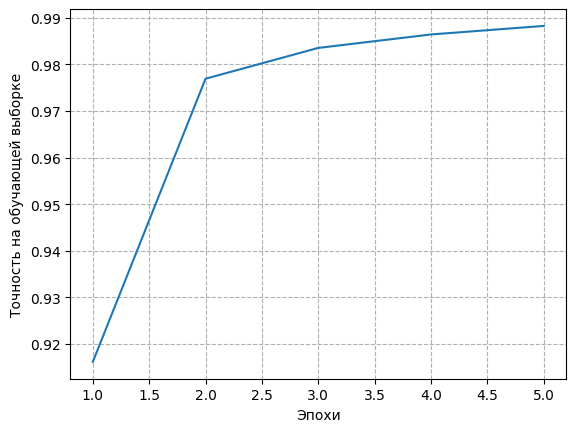

In [ ]:
plt.plot(list(range(1, ЧИСЛО_ЭПОХ+1)), history.history['accuracy'])
plt.xlabel("Эпохи")
plt.ylabel("Точность на обучающей выборке")
plt.grid(linestyle="--")
plt.show()

## 📚 Ссылки

* [Ещё практикумы по нейронным сетям](https://colab.research.google.com/github/MerkulovDaniil/sber219/blob/main/notebooks/10_1.ipynb)
* [TensorFlow sandbox](https://playground.tensorflow.org)
* [Запуск TensorFlow на GPU](http://learningtensorflow.com/lesson10/)
* [Визуализация модели](https://www.codesofinterest.com/2017/05/visualizing-keras-models-updated.html)
* [Официальная документация](https://keras.io/) - библиотека отлично документирована
* [Keras в конкретных примерах](https://github.com/tmheo/keras_exercise) - 25 отличных jupyter notebooks
* [Упражнения и примеры в Keras и TensorFlow](https://github.com/leriomaggio/deep-learning-keras-tensorflow)